In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 데이터 불러오기
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

# 확인
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 데이터 요약
train_df.info()

# 수치형 요약 통계
train_df.describe()

# 결측치 확인
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 비율 확인
survival_rate = train_df["Survived"].value_counts(normalize=True)
print(survival_rate)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


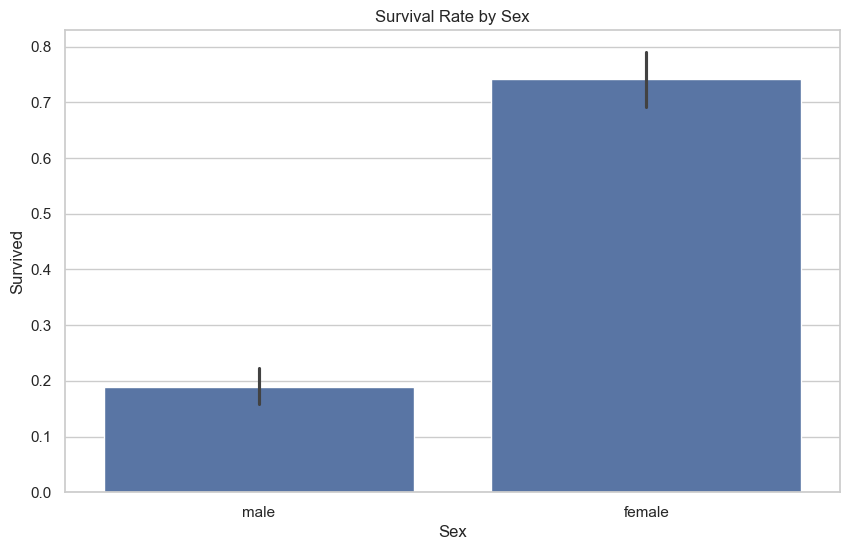

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


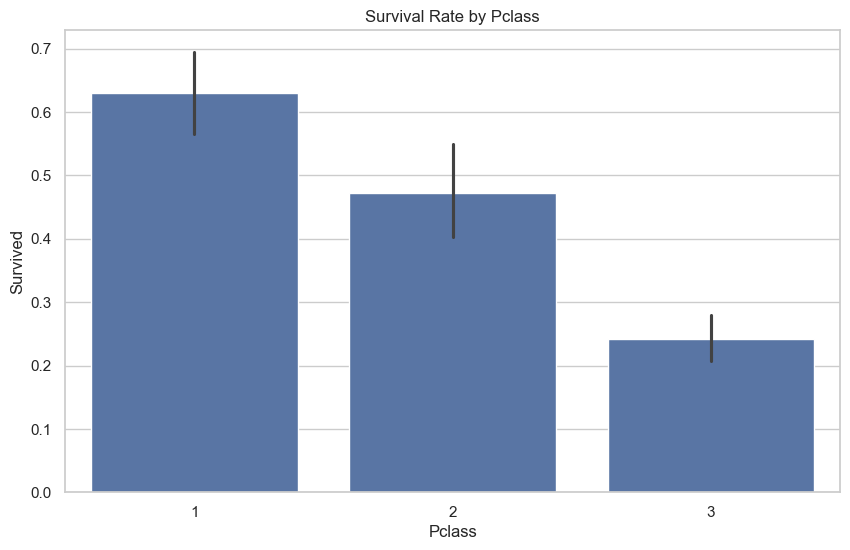

In [ ]:
# 성별 생존율
print(train_df.groupby("Sex")["Survived"].mean())

sns.barplot(x="Sex", y="Survived", data=train_df)
plt.title("Survival Rate by Sex")
plt.show()

# 등급별 생존율
print(train_df.groupby("Pclass")["Survived"].mean())

sns.barplot(x="Pclass", y="Survived", data=train_df)
plt.title("Survival Rate by Pclass")
plt.show()

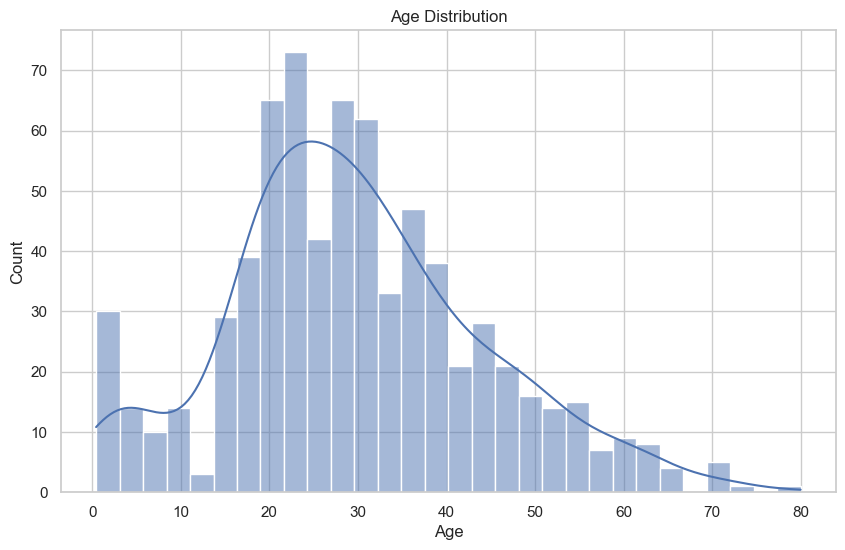

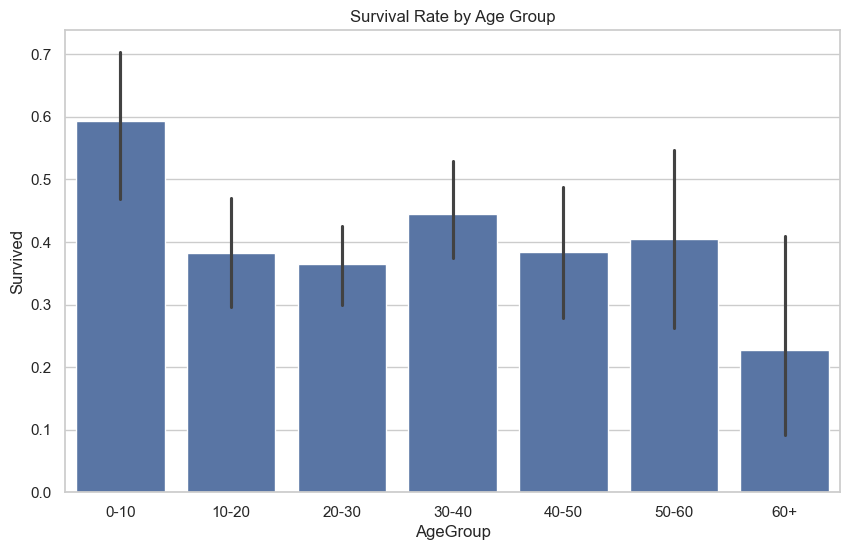

In [ ]:
# 나이 분포
sns.histplot(train_df["Age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# 나이에 따른 생존율 (Age binning)
train_df["AgeGroup"] = pd.cut(
    train_df["Age"],
    bins=[0, 10, 20, 30, 40, 50, 60, 80],
    labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60+"],
)

sns.barplot(x="AgeGroup", y="Survived", data=train_df)
plt.title("Survival Rate by Age Group")
plt.show()

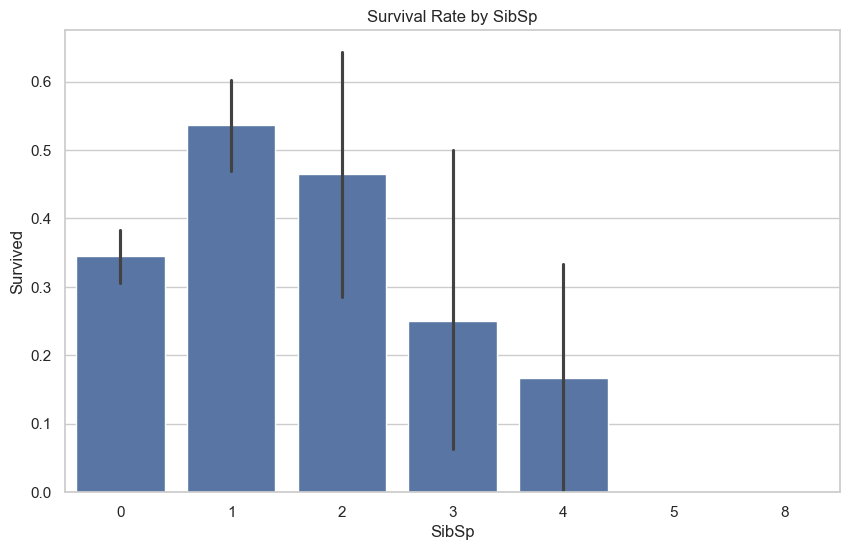

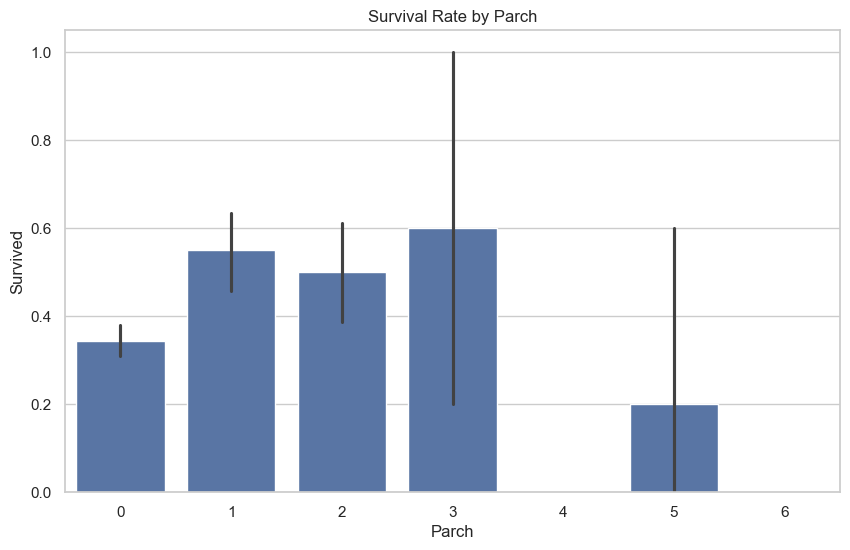

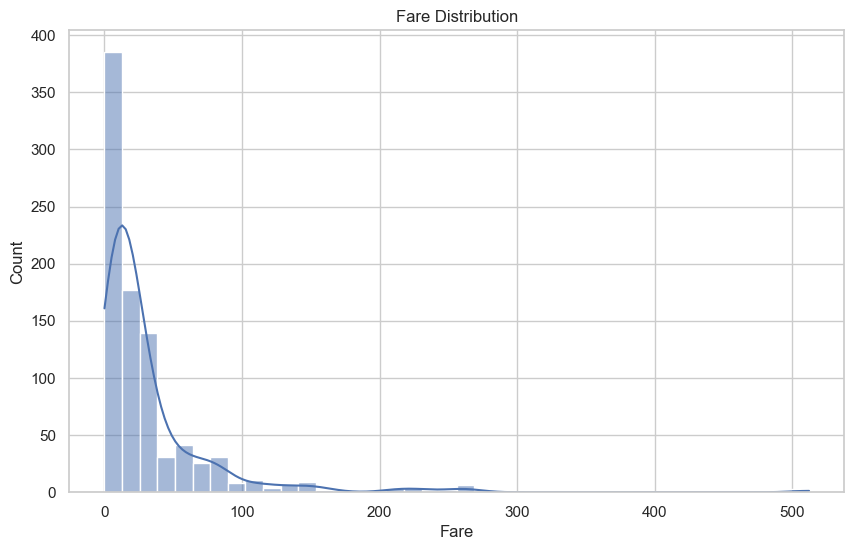

In [ ]:
# 형제자매/배우자 수
sns.barplot(x="SibSp", y="Survived", data=train_df)
plt.title("Survival Rate by SibSp")
plt.show()

# 부모/자식 수
sns.barplot(x="Parch", y="Survived", data=train_df)
plt.title("Survival Rate by Parch")
plt.show()

# 요금 Fare 분포
sns.histplot(train_df["Fare"], bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()

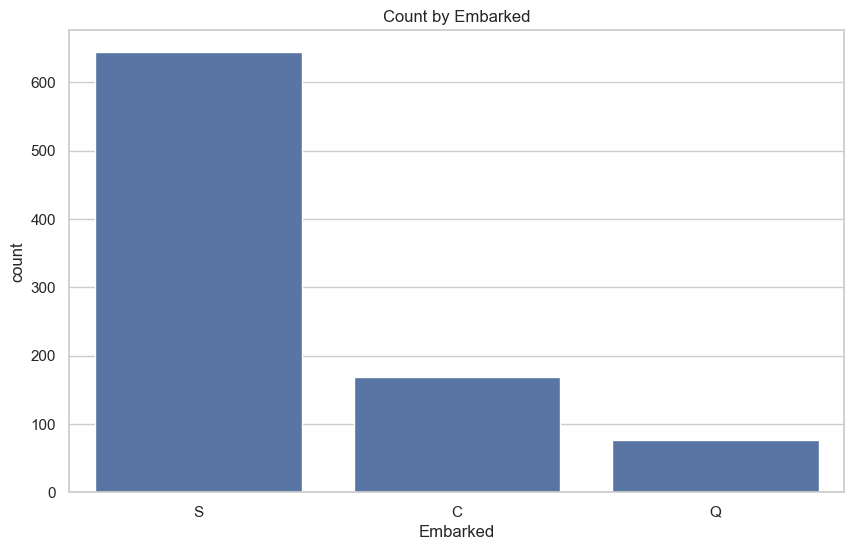

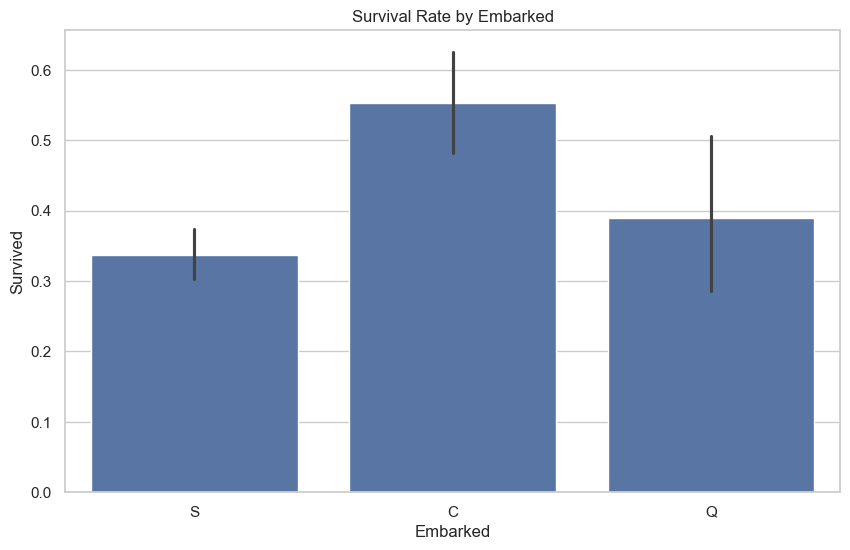

In [ ]:
sns.countplot(x="Embarked", data=train_df)
plt.title("Count by Embarked")
plt.show()

sns.barplot(x="Embarked", y="Survived", data=train_df)
plt.title("Survival Rate by Embarked")
plt.show()

여성 생존률 ↑

1등급 생존률 > 3등급 생존률

나이, 가족 수(SibSp/Parch)에 따라 영향 있음

Fare, Embarked도 영향 가능성 있음

Age, Cabin 등 일부 결측치 존재 → 전처리 필요
